# Download prerequisite module(s)

In [1]:
from time import time
import matplotlib.pyplot as plt

In [2]:
from osmnx import graph_from_bbox, graph_to_gdfs, plot_graph_route, plot_graph
from osmnx.distance import nearest_nodes, nearest_edges, shortest_path
from osmnx.utils_geo import interpolate_points, sample_points
from shapely.geometry import LineString, GeometryCollection, Point, MultiLineString
from geopandas import GeoDataFrame

In [3]:
import sys
import os
sys.path.append(os.path.abspath("..\\simulator"))

In [4]:
from map.map import sample_points_on_graph

[MAP] load local bkk graph


In [5]:
from rider.rider import Rider
from order_restaurant.order_restaurant_simulator import Destination, Order, OrderSimulator
from common.location import LocationEnum

In [6]:
startingTime = 0
getoffTime = 10000
restingTime = 30
location1 = sample_points_on_graph(1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/osmnx/utils_geo.py:45: UserWarning: graph should be undirected to not oversample bidirectional edges
  warnings.warn("graph should be undirected to not oversample bidirectional edges")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/osmnx/utils_geo.py:50: UserWarning: Geometry is in a geographic CRS. Results from 'interpolate' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return lines.interpolate(np.random.rand(n), normalized=True)


In [7]:
dest = (13.8345401, 100.5405318)
dest_point = Point(dest[1], dest[0])
order = Order(0, 0, 0)
dest = Destination(order, dest_point, LocationEnum.RESTAURANT, 0, 0)

In [8]:
#13.914579, 13.738166, 100.661622, 100.484028

In [9]:
rider = Rider(id, location1[0], startingTime , getoffTime, restingTime)

In [10]:
origin = (13.89234533775164, 100.58541225084495)
origin_point = Point(origin[1], origin[0])
rider.location = origin_point

In [11]:
north = max(origin_point.y, dest_point.y)
south = min(origin_point.y, dest_point.y)
east = max(origin_point.x, dest_point.x)
west = min(origin_point.x, dest_point.x)
k = 0.005
zoom_graph = graph_from_bbox(north+k, south-k, east+k, west-k, network_type='drive')

In [12]:
rider.destinations.append(dest)

In [13]:
rider.current_traveling_time

0

In [14]:
rider_location = list()

In [15]:
for t in range(10000):
    try:
        rider.simulate(t)
        rider_location.append(rider.location)
    except:
        break
    

In [16]:
location1, dest_point

([<POINT (100.561 13.856)>], <POINT (100.541 13.835)>)

In [17]:
print(rider.path)

MULTILINESTRING ((100.58541225084495 13.89234533775164, 100.5862941 13.8642145), (100.5862941 13.8642145, 100.5857835 13.8641332), (100.5857835 13.8641332, 100.5858493 13.8637705), (100.5858493 13.8637705, 100.5854826 13.8637136), (100.5854826 13.8637136, 100.5852121 13.8636736), (100.5852121 13.8636736, 100.5845736 13.8635716), (100.5845736 13.8635716, 100.5839676 13.8634767), (100.5839676 13.8634767, 100.5836537 13.8634204), (100.5836537 13.8634204, 100.583338 13.8633638), (100.583338 13.8633638, 100.5827327 13.8632698), (100.5827327 13.8632698, 100.5825852 13.8641594), (100.5825852 13.8641594, 100.5819577 13.8640665), (100.5819577 13.8640665, 100.5813345 13.8639678), (100.5813345 13.8639678, 100.5809081 13.8639149), (100.5809081 13.8639149, 100.5804495 13.8638301), (100.5804495 13.8638301, 100.5798745 13.8638391), (100.5798745 13.8638391, 100.57975 13.8640203), (100.57975 13.8640203, 100.5795987 13.8641231), (100.5795987 13.8641231, 100.5789459 13.8640278), (100.5789459 13.8640278, 

In [18]:
rider.path.length

0.1110003050283705

In [19]:
rider.path.length/rider.speed

1995.0516409530387

In [20]:
rider.current_traveling_time

1996

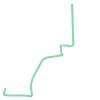

In [21]:
rider.path

In [22]:
origin_node = nearest_nodes(zoom_graph, origin_point.x, origin_point.y, return_dist=False)
destination_node = nearest_nodes(zoom_graph, dest_point.x, dest_point.y, return_dist=False)
origin_node, destination_node

(61892809, 1710479020)

In [23]:
from map.map import graph, nodes


In [24]:
nodes.loc[origin_node]['geometry']

KeyError: 61892809

In [ ]:
path = shortest_path(graph, origin_node, destination_node)
path

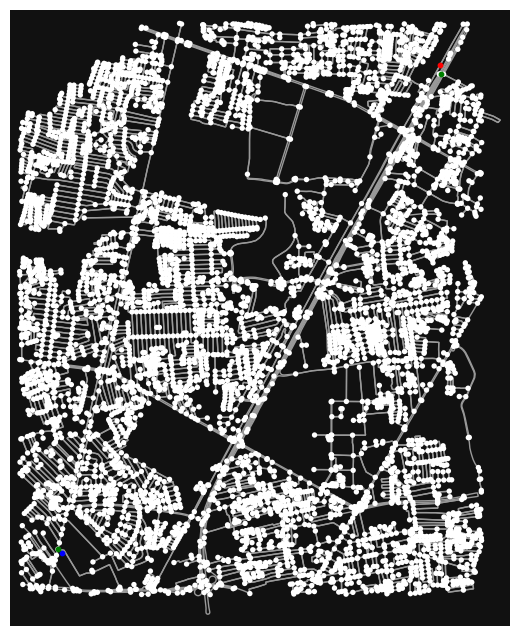

In [ ]:
fig, ax = plot_graph(zoom_graph, show=False, close=False)
# geometry = [l for l in  rider_location]
# gdf = GeoDataFrame(geometry = geometry)
# gdf.plot(ax=ax, markersize = 0.01, color = "green" , zorder=7)
geometry = [origin_point]
gdf = GeoDataFrame(geometry = geometry)
gdf.plot(ax=ax, markersize = 10, color = "red" , zorder=7)

geometry = [dest_point]
gdf = GeoDataFrame(geometry = geometry)
gdf.plot(ax=ax, markersize = 10, color = "blue" , zorder=7)

geometry = [nodes.loc[origin_node]['geometry'], nodes.loc[destination_node]['geometry']]
gdf = GeoDataFrame(geometry = geometry)
gdf.plot(ax=ax, markersize = 10, color = "green" , zorder=7)
plt.show()